# Project 1 TAA

## Expression Recognition with Keras

### Load datasets from file

In [14]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#to load matlab mat files
from scipy.io import loadmat
# for neural network
import tensorflow as tf
from tensorflow import keras

In [15]:
# labelNames = ["angry", "fear", "happy", "neutral", "sad", "surprise"]
labelNames = ["happy", "neutral"]

# Load Training data
mat=loadmat(f"../datasets/train/{'_'.join(labelNames)}.mat")
# mat is a dict with key "X" for x-values, and key "y" for y values
X, y = mat["X"], mat["y"]

# Load Dev Data
matDev=loadmat(f"../datasets/dev/{'_'.join(labelNames)}.mat")
X_valid, y_valid = matDev["X"], matDev["y"]

# Load Test Data
matTest=loadmat(f"../datasets/goncalo_catalog/{'_'.join(labelNames)}.mat")
X_test, y_test = matTest["X"], matTest["y"]

In [17]:
# numbers
m = X.shape[0] # number of training examples
labels = np.max(y)+1 # number of labels
features = X.shape[1] # number of features per example

print(f"Loaded {m} traing examples with {labels} labels, each with {features} features (pixels).")
print("Labels are:", ', '.join(labelNames))

print(f"Loaded {X_valid.shape[0]} dev examples.")
print(f"Loaded {X_test.shape[0]} test examples.")

Loaded 2000 traing examples with 2 labels, each with 2304 features (pixels).
Labels are: happy, neutral
Loaded 400 dev examples.
Loaded 19 test examples.


### Some examples

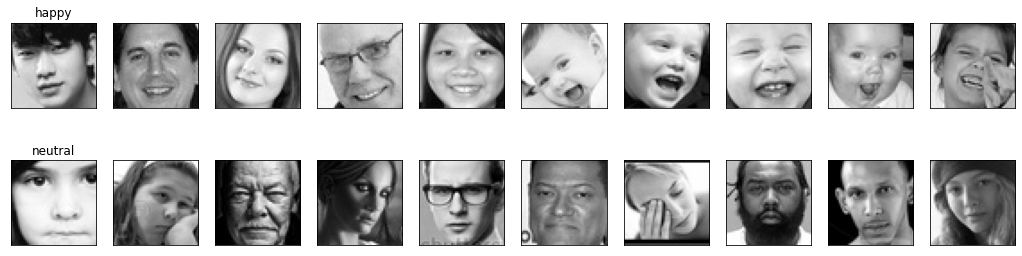

In [18]:
examplesNumber = 10
fig, axis = plt.subplots(labels,examplesNumber,figsize=(18,2*labels))
fig.subplots_adjust(top=1)

# Foreach label, output 10 random images
for i in range(labels):
    for j in range(examplesNumber):
        # Show image
        axis[i,j].imshow(X[np.random.randint((m/labels)*(i),(m/labels)*(i+1)+1),:].reshape(48,48,order="F").T, cmap="gray") 
        # Hide axes
        axis[i,j].set_xticks([])
        axis[i,j].set_yticks([])
        # Display title only on first
        if j==0:
            axis[i,j].set_title(labelNames[i])

### The neural network

Based on https://medium.com/nerd-for-tech/how-to-train-neural-networks-for-image-classification-part-1-21327fe1cc1

In [20]:
# Important variables
iterations = 1500
hiddenLayers = [144,144]
hyperParameter = 0.001

#### Build the network

In [22]:
# Create model
modelSeq = []
# Flattens each image (48x48) to 1x2304
modelSeq.append(keras.layers.Flatten(input_shape = [48, 48]))
# Hidden layers with relu activation function
for h in hiddenLayers:
    modelSeq.append(keras.layers.Dense(
        h, 
        activation = "relu", 
        bias_regularizer= keras.regularizers.l2(hyperParameter) if hyperParameter else None
    ))
# Output layer with softmax activation function
modelSeq.append(keras.layers.Dense(
    labels, 
    activation = "softmax",
    bias_regularizer= keras.regularizers.l2(hyperParameter) if hyperParameter else None
))

model = keras.models.Sequential(modelSeq)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 144)               331920    
_________________________________________________________________
dense_1 (Dense)              (None, 144)               20880     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 290       
Total params: 353,090
Trainable params: 353,090
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compile model

model.compile(
    # Using sparse categorical crossentropy loss function
    loss = "sparse_categorical_crossentropy",
    # Using stochastic gradient descent as gradient descent
    optimizer = "sgd",
    # In addition to cost, we want accuracy to help understanding how the model is working 
    metrics = ["accuracy"]
)

#### Train the network

In [24]:
history = model.fit(
    X,
    y,
    epochs = iterations,
    batch_size = 128,
    validation_data = (X_valid, y_valid)
)

Epoch 1/1500
16/16 [==============================] - 1s 26ms/step - loss: 0.7212 - accuracy: 0.5337 - val_loss: 0.6830 - val_accuracy: 0.5450
Epoch 2/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.6766 - accuracy: 0.5725 - val_loss: 0.6616 - val_accuracy: 0.6175
Epoch 3/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.6678 - accuracy: 0.5940 - val_loss: 0.6564 - val_accuracy: 0.6050
Epoch 4/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.6547 - accuracy: 0.6252 - val_loss: 0.6569 - val_accuracy: 0.6300
Epoch 5/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.6461 - accuracy: 0.6404 - val_loss: 0.6594 - val_accuracy: 0.6000
Epoch 6/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.6596 - accuracy: 0.6040 - val_loss: 0.6558 - val_accuracy: 0.5900
Epoch 7/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.6606 - accuracy: 0.5969 - val_loss: 0.6372 - val_accuracy: 0.6275
Epoch

16/16 [==============================] - 0s 9ms/step - loss: 0.6034 - accuracy: 0.6782 - val_loss: 0.5629 - val_accuracy: 0.7375
Epoch 52/1500
16/16 [==============================] - 0s 9ms/step - loss: 0.5244 - accuracy: 0.7674 - val_loss: 0.6086 - val_accuracy: 0.6475
Epoch 53/1500
16/16 [==============================] - 0s 12ms/step - loss: 0.5588 - accuracy: 0.7093 - val_loss: 0.5588 - val_accuracy: 0.7450
Epoch 54/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.5431 - accuracy: 0.7483 - val_loss: 0.6571 - val_accuracy: 0.6250
Epoch 55/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.5865 - accuracy: 0.6791 - val_loss: 0.5550 - val_accuracy: 0.7500
Epoch 56/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.5313 - accuracy: 0.7408 - val_loss: 0.5977 - val_accuracy: 0.6500
Epoch 57/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.5255 - accuracy: 0.7458 - val_loss: 0.5912 - val_accuracy: 0.6925
Epoch 58/150

16/16 [==============================] - 0s 8ms/step - loss: 0.4992 - accuracy: 0.7540 - val_loss: 0.5542 - val_accuracy: 0.7075
Epoch 109/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.4864 - accuracy: 0.7577 - val_loss: 0.5609 - val_accuracy: 0.6900
Epoch 110/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.4807 - accuracy: 0.7714 - val_loss: 0.5341 - val_accuracy: 0.7525
Epoch 111/1500
16/16 [==============================] - 0s 9ms/step - loss: 0.4755 - accuracy: 0.7943 - val_loss: 0.6199 - val_accuracy: 0.6750
Epoch 112/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.5034 - accuracy: 0.7491 - val_loss: 0.5357 - val_accuracy: 0.7550
Epoch 113/1500
16/16 [==============================] - 0s 10ms/step - loss: 0.4551 - accuracy: 0.7930 - val_loss: 0.7109 - val_accuracy: 0.6500
Epoch 114/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.5273 - accuracy: 0.7421 - val_loss: 0.6263 - val_accuracy: 0.6650
Epoch 

Epoch 165/1500
16/16 [==============================] - 0s 10ms/step - loss: 0.3902 - accuracy: 0.8366 - val_loss: 0.5512 - val_accuracy: 0.7375
Epoch 166/1500
16/16 [==============================] - 0s 11ms/step - loss: 0.4272 - accuracy: 0.8114 - val_loss: 0.5406 - val_accuracy: 0.7325
Epoch 167/1500
16/16 [==============================] - 0s 13ms/step - loss: 0.3756 - accuracy: 0.8511 - val_loss: 0.6031 - val_accuracy: 0.7100
Epoch 168/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.4864 - accuracy: 0.7622 - val_loss: 0.5318 - val_accuracy: 0.7325
Epoch 169/1500
16/16 [==============================] - 0s 12ms/step - loss: 0.4163 - accuracy: 0.8218 - val_loss: 0.6009 - val_accuracy: 0.6475
Epoch 170/1500
16/16 [==============================] - 0s 15ms/step - loss: 0.4099 - accuracy: 0.8018 - val_loss: 0.5460 - val_accuracy: 0.7500
Epoch 171/1500
16/16 [==============================] - 0s 15ms/step - loss: 0.4273 - accuracy: 0.8007 - val_loss: 0.5449 - val_acc

16/16 [==============================] - 0s 9ms/step - loss: 0.3454 - accuracy: 0.8540 - val_loss: 0.6357 - val_accuracy: 0.7200
Epoch 222/1500
16/16 [==============================] - 0s 9ms/step - loss: 0.3668 - accuracy: 0.8376 - val_loss: 0.7733 - val_accuracy: 0.6250
Epoch 223/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.4311 - accuracy: 0.7903 - val_loss: 0.5674 - val_accuracy: 0.7475
Epoch 224/1500
16/16 [==============================] - 0s 10ms/step - loss: 0.3370 - accuracy: 0.8588 - val_loss: 0.5744 - val_accuracy: 0.7000
Epoch 225/1500
16/16 [==============================] - 0s 10ms/step - loss: 0.3423 - accuracy: 0.8722 - val_loss: 0.5665 - val_accuracy: 0.7000
Epoch 226/1500
16/16 [==============================] - 0s 10ms/step - loss: 0.3330 - accuracy: 0.8681 - val_loss: 0.5423 - val_accuracy: 0.7400
Epoch 227/1500
16/16 [==============================] - 0s 9ms/step - loss: 0.3350 - accuracy: 0.8686 - val_loss: 0.5877 - val_accuracy: 0.6825
Epoc

Epoch 278/1500
16/16 [==============================] - 0s 9ms/step - loss: 0.2530 - accuracy: 0.9099 - val_loss: 0.8268 - val_accuracy: 0.6850
Epoch 279/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.4666 - accuracy: 0.7934 - val_loss: 0.6298 - val_accuracy: 0.7425
Epoch 280/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.3164 - accuracy: 0.8570 - val_loss: 0.6399 - val_accuracy: 0.7225
Epoch 281/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.3215 - accuracy: 0.8623 - val_loss: 0.7905 - val_accuracy: 0.6225
Epoch 282/1500
16/16 [==============================] - 0s 12ms/step - loss: 0.3372 - accuracy: 0.8558 - val_loss: 0.5709 - val_accuracy: 0.6850
Epoch 283/1500
16/16 [==============================] - 0s 9ms/step - loss: 0.2573 - accuracy: 0.9197 - val_loss: 0.5738 - val_accuracy: 0.6975
Epoch 284/1500
16/16 [==============================] - 0s 11ms/step - loss: 0.2556 - accuracy: 0.9083 - val_loss: 0.6187 - val_accurac

Epoch 335/1500
16/16 [==============================] - 0s 9ms/step - loss: 0.2011 - accuracy: 0.9356 - val_loss: 0.6285 - val_accuracy: 0.7275
Epoch 336/1500
16/16 [==============================] - 0s 11ms/step - loss: 0.2044 - accuracy: 0.9380 - val_loss: 0.5810 - val_accuracy: 0.6825
Epoch 337/1500
16/16 [==============================] - 0s 9ms/step - loss: 0.1961 - accuracy: 0.9542 - val_loss: 0.7032 - val_accuracy: 0.7225
Epoch 338/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.3006 - accuracy: 0.8623 - val_loss: 0.6387 - val_accuracy: 0.6925
Epoch 339/1500
16/16 [==============================] - 0s 9ms/step - loss: 0.2740 - accuracy: 0.8786 - val_loss: 0.6999 - val_accuracy: 0.7225
Epoch 340/1500
16/16 [==============================] - 0s 9ms/step - loss: 0.2295 - accuracy: 0.9183 - val_loss: 0.7160 - val_accuracy: 0.7225
Epoch 341/1500
16/16 [==============================] - 0s 9ms/step - loss: 0.3256 - accuracy: 0.8573 - val_loss: 0.6051 - val_accuracy

Epoch 392/1500
16/16 [==============================] - 0s 12ms/step - loss: 0.2503 - accuracy: 0.9096 - val_loss: 0.7632 - val_accuracy: 0.6550
Epoch 393/1500
16/16 [==============================] - 0s 12ms/step - loss: 0.2150 - accuracy: 0.9202 - val_loss: 0.6764 - val_accuracy: 0.7050
Epoch 394/1500
16/16 [==============================] - 0s 14ms/step - loss: 0.1210 - accuracy: 0.9718 - val_loss: 0.7022 - val_accuracy: 0.6875
Epoch 395/1500
16/16 [==============================] - 0s 13ms/step - loss: 0.2231 - accuracy: 0.9115 - val_loss: 0.6732 - val_accuracy: 0.7000
Epoch 396/1500
16/16 [==============================] - 0s 14ms/step - loss: 0.1225 - accuracy: 0.9728 - val_loss: 0.6742 - val_accuracy: 0.7000
Epoch 397/1500
16/16 [==============================] - 0s 14ms/step - loss: 0.1129 - accuracy: 0.9800 - val_loss: 0.6701 - val_accuracy: 0.7375
Epoch 398/1500
16/16 [==============================] - 0s 16ms/step - loss: 0.2954 - accuracy: 0.8939 - val_loss: 0.6085 - val_ac

16/16 [==============================] - 0s 17ms/step - loss: 0.0887 - accuracy: 0.9885 - val_loss: 0.7024 - val_accuracy: 0.7000
Epoch 449/1500
16/16 [==============================] - 0s 16ms/step - loss: 0.0937 - accuracy: 0.9800 - val_loss: 0.7678 - val_accuracy: 0.7350
Epoch 450/1500
16/16 [==============================] - 0s 15ms/step - loss: 0.1598 - accuracy: 0.9327 - val_loss: 0.6901 - val_accuracy: 0.7175
Epoch 451/1500
16/16 [==============================] - 0s 12ms/step - loss: 0.0791 - accuracy: 0.9932 - val_loss: 0.7199 - val_accuracy: 0.7000
Epoch 452/1500
16/16 [==============================] - 0s 16ms/step - loss: 0.2763 - accuracy: 0.8935 - val_loss: 0.6187 - val_accuracy: 0.6900
Epoch 453/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.1491 - accuracy: 0.9608 - val_loss: 0.7213 - val_accuracy: 0.6850
Epoch 454/1500
16/16 [==============================] - 0s 10ms/step - loss: 0.1129 - accuracy: 0.9736 - val_loss: 0.6894 - val_accuracy: 0.7025
E

Epoch 505/1500
16/16 [==============================] - 0s 16ms/step - loss: 0.0912 - accuracy: 0.9916 - val_loss: 0.7343 - val_accuracy: 0.7050
Epoch 506/1500
16/16 [==============================] - 0s 16ms/step - loss: 0.0659 - accuracy: 0.9924 - val_loss: 0.7517 - val_accuracy: 0.7050
Epoch 507/1500
16/16 [==============================] - 0s 18ms/step - loss: 0.0613 - accuracy: 0.9945 - val_loss: 0.7661 - val_accuracy: 0.7050
Epoch 508/1500
16/16 [==============================] - 0s 15ms/step - loss: 0.0713 - accuracy: 0.9880 - val_loss: 0.7574 - val_accuracy: 0.7050
Epoch 509/1500
16/16 [==============================] - 0s 16ms/step - loss: 0.0569 - accuracy: 0.9959 - val_loss: 0.7809 - val_accuracy: 0.7100
Epoch 510/1500
16/16 [==============================] - 0s 15ms/step - loss: 0.0766 - accuracy: 0.9852 - val_loss: 0.7627 - val_accuracy: 0.7150
Epoch 511/1500
16/16 [==============================] - 0s 12ms/step - loss: 0.0490 - accuracy: 0.9967 - val_loss: 0.7910 - val_ac

16/16 [==============================] - 0s 7ms/step - loss: 0.0343 - accuracy: 0.9987 - val_loss: 0.8497 - val_accuracy: 0.7025
Epoch 562/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0329 - accuracy: 0.9988 - val_loss: 0.8514 - val_accuracy: 0.7100
Epoch 563/1500
16/16 [==============================] - 0s 11ms/step - loss: 0.0329 - accuracy: 0.9992 - val_loss: 0.8539 - val_accuracy: 0.6975
Epoch 564/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0369 - accuracy: 0.9963 - val_loss: 1.0231 - val_accuracy: 0.7200
Epoch 565/1500
16/16 [==============================] - 0s 10ms/step - loss: 1.1090 - accuracy: 0.7666 - val_loss: 0.7099 - val_accuracy: 0.6775
Epoch 566/1500
16/16 [==============================] - 0s 15ms/step - loss: 0.3737 - accuracy: 0.8319 - val_loss: 0.6715 - val_accuracy: 0.6700
Epoch 567/1500
16/16 [==============================] - 0s 14ms/step - loss: 0.3382 - accuracy: 0.8689 - val_loss: 0.6214 - val_accuracy: 0.7025
Epo

Epoch 618/1500
16/16 [==============================] - 0s 12ms/step - loss: 0.0307 - accuracy: 0.9989 - val_loss: 0.8852 - val_accuracy: 0.7250
Epoch 619/1500
16/16 [==============================] - 0s 11ms/step - loss: 0.0283 - accuracy: 0.9987 - val_loss: 0.8732 - val_accuracy: 0.7050
Epoch 620/1500
16/16 [==============================] - 0s 10ms/step - loss: 0.0303 - accuracy: 0.9988 - val_loss: 0.8659 - val_accuracy: 0.6975
Epoch 621/1500
16/16 [==============================] - 0s 12ms/step - loss: 0.0331 - accuracy: 0.9982 - val_loss: 0.8695 - val_accuracy: 0.7075
Epoch 622/1500
16/16 [==============================] - 0s 10ms/step - loss: 0.0325 - accuracy: 0.9983 - val_loss: 0.9081 - val_accuracy: 0.7150
Epoch 623/1500
16/16 [==============================] - 0s 10ms/step - loss: 0.0355 - accuracy: 0.9976 - val_loss: 0.8842 - val_accuracy: 0.7300
Epoch 624/1500
16/16 [==============================] - 0s 12ms/step - loss: 0.0339 - accuracy: 0.9974 - val_loss: 0.9138 - val_ac

Epoch 675/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.0218 - accuracy: 0.9992 - val_loss: 0.9292 - val_accuracy: 0.7125
Epoch 676/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.0233 - accuracy: 0.9990 - val_loss: 0.9306 - val_accuracy: 0.7150
Epoch 677/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.0225 - accuracy: 0.9986 - val_loss: 0.9649 - val_accuracy: 0.6950
Epoch 678/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.0237 - accuracy: 0.9989 - val_loss: 0.9398 - val_accuracy: 0.7275
Epoch 679/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.0233 - accuracy: 0.9986 - val_loss: 0.9506 - val_accuracy: 0.7200
Epoch 680/1500
16/16 [==============================] - 0s 9ms/step - loss: 0.0200 - accuracy: 0.9991 - val_loss: 0.9436 - val_accuracy: 0.7175
Epoch 681/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.0222 - accuracy: 0.9986 - val_loss: 0.9583 - val_accuracy:

Epoch 732/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.0122 - accuracy: 0.9998 - val_loss: 1.0228 - val_accuracy: 0.7050
Epoch 733/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0123 - accuracy: 0.9997 - val_loss: 1.0173 - val_accuracy: 0.6975
Epoch 734/1500
16/16 [==============================] - 0s 11ms/step - loss: 0.0134 - accuracy: 0.9995 - val_loss: 1.0231 - val_accuracy: 0.7150
Epoch 735/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0132 - accuracy: 0.9993 - val_loss: 1.0364 - val_accuracy: 0.6925
Epoch 736/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0103 - accuracy: 0.9999 - val_loss: 1.0221 - val_accuracy: 0.7000
Epoch 737/1500
16/16 [==============================] - 0s 10ms/step - loss: 0.0121 - accuracy: 0.9995 - val_loss: 1.0274 - val_accuracy: 0.7075
Epoch 738/1500
16/16 [==============================] - 0s 11ms/step - loss: 0.0114 - accuracy: 0.9998 - val_loss: 1.0146 - val_accura

Epoch 789/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 1.0693 - val_accuracy: 0.7025
Epoch 790/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0093 - accuracy: 0.9991 - val_loss: 1.0737 - val_accuracy: 0.7200
Epoch 791/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0099 - accuracy: 0.9995 - val_loss: 1.0684 - val_accuracy: 0.7000
Epoch 792/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0093 - accuracy: 0.9995 - val_loss: 1.0712 - val_accuracy: 0.7150
Epoch 793/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0122 - accuracy: 0.9984 - val_loss: 1.0655 - val_accuracy: 0.7200
Epoch 794/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0109 - accuracy: 0.9984 - val_loss: 1.0750 - val_accuracy: 0.7175
Epoch 795/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0089 - accuracy: 0.9996 - val_loss: 1.0731 - val_accuracy:

Epoch 846/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0077 - accuracy: 0.9991 - val_loss: 1.1046 - val_accuracy: 0.7075
Epoch 847/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0066 - accuracy: 0.9999 - val_loss: 1.1092 - val_accuracy: 0.6975
Epoch 848/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0073 - accuracy: 0.9996 - val_loss: 1.1072 - val_accuracy: 0.7125
Epoch 849/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.0085 - accuracy: 0.9991 - val_loss: 1.1089 - val_accuracy: 0.7225
Epoch 850/1500
16/16 [==============================] - 0s 10ms/step - loss: 0.0081 - accuracy: 0.9991 - val_loss: 1.1109 - val_accuracy: 0.7175
Epoch 851/1500
16/16 [==============================] - 0s 11ms/step - loss: 0.0066 - accuracy: 0.9999 - val_loss: 1.1244 - val_accuracy: 0.7150
Epoch 852/1500
16/16 [==============================] - 0s 11ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 1.1185 - val_accura

Epoch 903/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0067 - accuracy: 0.9989 - val_loss: 1.1469 - val_accuracy: 0.7000
Epoch 904/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0060 - accuracy: 0.9998 - val_loss: 1.1404 - val_accuracy: 0.7000
Epoch 905/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0054 - accuracy: 0.9998 - val_loss: 1.1386 - val_accuracy: 0.7175
Epoch 906/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0054 - accuracy: 0.9997 - val_loss: 1.1461 - val_accuracy: 0.6975
Epoch 907/1500
16/16 [==============================] - 0s 9ms/step - loss: 0.0056 - accuracy: 0.9999 - val_loss: 1.1822 - val_accuracy: 0.7150
Epoch 908/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 1.1489 - val_accuracy: 0.7125
Epoch 909/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 1.1427 - val_accuracy:

Epoch 960/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 1.1753 - val_accuracy: 0.7175
Epoch 961/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 1.1823 - val_accuracy: 0.7025
Epoch 962/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.1804 - val_accuracy: 0.7200
Epoch 963/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.1801 - val_accuracy: 0.7150
Epoch 964/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.1706 - val_accuracy: 0.7175
Epoch 965/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 1.1830 - val_accuracy: 0.7100
Epoch 966/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.1812 - val_accuracy:

Epoch 1017/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 1.2115 - val_accuracy: 0.7225
Epoch 1018/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 1.2051 - val_accuracy: 0.7150
Epoch 1019/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 1.2087 - val_accuracy: 0.7050
Epoch 1020/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.2030 - val_accuracy: 0.7225
Epoch 1021/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 1.2087 - val_accuracy: 0.7150
Epoch 1022/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.2082 - val_accuracy: 0.7100
Epoch 1023/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.2098 - val_ac

16/16 [==============================] - 0s 9ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.2261 - val_accuracy: 0.7275
Epoch 1074/1500
16/16 [==============================] - 0s 12ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 1.2254 - val_accuracy: 0.7150
Epoch 1075/1500
16/16 [==============================] - 0s 13ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.2282 - val_accuracy: 0.7125
Epoch 1076/1500
16/16 [==============================] - 0s 14ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 1.2334 - val_accuracy: 0.7250
Epoch 1077/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 1.2365 - val_accuracy: 0.7175
Epoch 1078/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 1.2296 - val_accuracy: 0.7250
Epoch 1079/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 1.2326 - val_accuracy: 0.712

16/16 [==============================] - 0s 11ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 1.2560 - val_accuracy: 0.7175
Epoch 1130/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.2551 - val_accuracy: 0.7100
Epoch 1131/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 1.2451 - val_accuracy: 0.7200
Epoch 1132/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 1.2524 - val_accuracy: 0.7225
Epoch 1133/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.2574 - val_accuracy: 0.7225
Epoch 1134/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 1.2604 - val_accuracy: 0.7150
Epoch 1135/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.2523 - val_accuracy: 0.7200


16/16 [==============================] - 0s 8ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.2745 - val_accuracy: 0.7225
Epoch 1186/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.2689 - val_accuracy: 0.7200
Epoch 1187/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.2748 - val_accuracy: 0.7200
Epoch 1188/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.2778 - val_accuracy: 0.7175
Epoch 1189/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.2772 - val_accuracy: 0.7200
Epoch 1190/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.2753 - val_accuracy: 0.7275
Epoch 1191/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.2765 - val_accuracy: 0.7225
E

16/16 [==============================] - 0s 8ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.2945 - val_accuracy: 0.7200
Epoch 1242/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.2892 - val_accuracy: 0.7250
Epoch 1243/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.2931 - val_accuracy: 0.7175
Epoch 1244/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.2946 - val_accuracy: 0.7275
Epoch 1245/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.2968 - val_accuracy: 0.7175
Epoch 1246/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.2930 - val_accuracy: 0.7200
Epoch 1247/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.2976 - val_accuracy: 0.7200
E

16/16 [==============================] - 0s 9ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.3133 - val_accuracy: 0.7125
Epoch 1298/1500
16/16 [==============================] - 0s 9ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.3126 - val_accuracy: 0.7200
Epoch 1299/1500
16/16 [==============================] - 0s 9ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.3110 - val_accuracy: 0.7225
Epoch 1300/1500
16/16 [==============================] - 0s 9ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.3121 - val_accuracy: 0.7225
Epoch 1301/1500
16/16 [==============================] - 0s 9ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.3160 - val_accuracy: 0.7225
Epoch 1302/1500
16/16 [==============================] - 0s 9ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.3146 - val_accuracy: 0.7250
Epoch 1303/1500
16/16 [==============================] - 0s 9ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.3146 - val_accuracy: 0.7150
E

16/16 [==============================] - 0s 7ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.3267 - val_accuracy: 0.7225
Epoch 1354/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.3306 - val_accuracy: 0.7250
Epoch 1355/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.3256 - val_accuracy: 0.7175
Epoch 1356/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.3285 - val_accuracy: 0.7225
Epoch 1357/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.3315 - val_accuracy: 0.7300
Epoch 1358/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.3277 - val_accuracy: 0.7225
Epoch 1359/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.3291 - val_accuracy: 0.7200
E

16/16 [==============================] - 0s 8ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.3462 - val_accuracy: 0.7225
Epoch 1410/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.3451 - val_accuracy: 0.7225
Epoch 1411/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.3488 - val_accuracy: 0.7250
Epoch 1412/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.3490 - val_accuracy: 0.7200
Epoch 1413/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.3473 - val_accuracy: 0.7225
Epoch 1414/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.3495 - val_accuracy: 0.7225
Epoch 1415/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.3490 - val_accuracy: 0.7250
E

16/16 [==============================] - 0s 7ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.3692 - val_accuracy: 0.7225
Epoch 1466/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.3679 - val_accuracy: 0.7175
Epoch 1467/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.3648 - val_accuracy: 0.7175
Epoch 1468/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.3683 - val_accuracy: 0.7175
Epoch 1469/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.3682 - val_accuracy: 0.7175
Epoch 1470/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.3697 - val_accuracy: 0.7125
Epoch 1471/1500
16/16 [==============================] - 0s 9ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.3696 - val_accuracy: 0.7200
E

#### Evaluate the performance with test set

In [25]:
model.evaluate(X_test, y_test, return_dict=True)

1/1 [==============================] - 0s 44ms/step - loss: 0.7710 - accuracy: 0.7368


{'loss': 0.7710375785827637, 'accuracy': 0.7368420958518982}

### Analysys

#### Training metrics

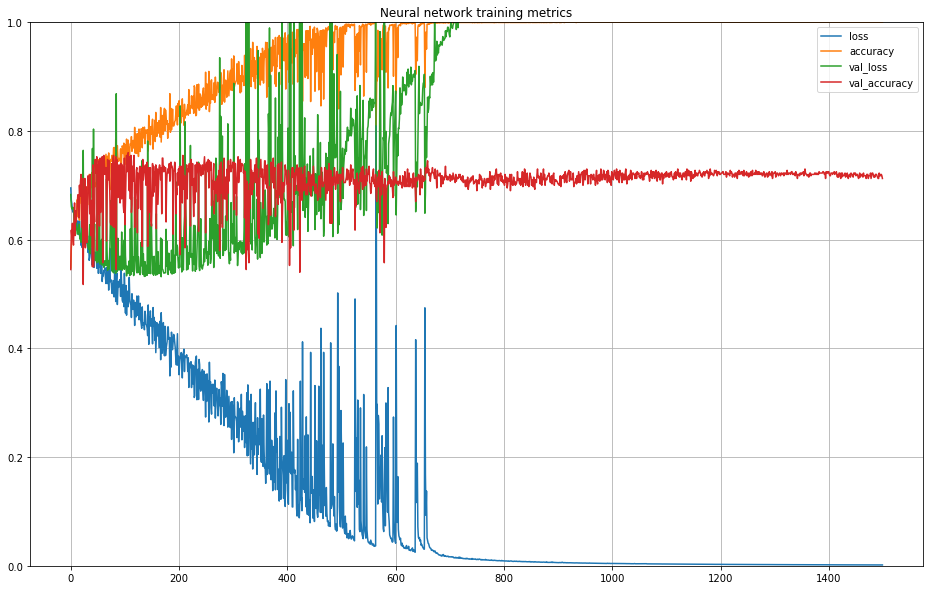

In [26]:
pd.DataFrame(history.history).plot(figsize = (16, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Neural network training metrics")
plt.show()

> If the loss does not look like it has reached a minimum (being stable on the end), it suggests we can train the network further.

> It is normal that the accuracy for the training set is higher than for the validation set, but they might be close. If not, there is overfitting!

#### Confusion matrix

In [27]:
def confusionMatrix(labels, pred, y):
    
    confusionTFPN = {}
    confusionLabels = {}
    
    # Foreach emotion
    for ie in range(len(labels)):
        # TRUE AND FALSE POSITIVES AND NEGATIVES (TFPN)
        
        # Get indexes where emotion was predicted
        ieIndexesPred = [i for i in range(pred.size) if pred[i]==ie]
        ieIndexesNotPred = [i for i in range(pred.size) if pred[i]!=ie]

        # Predicted, and Actual
        TP = sum(pred[:,np.newaxis][ieIndexesPred]==y[ieIndexesPred])
        # Predicted, but not actual
        FP = sum(pred[:,np.newaxis][ieIndexesPred]!=y[ieIndexesPred])
        # Not predicted, but actual
        FN = sum(y[ieIndexesNotPred]==ie)
        # Not predicted and not actual
        TN = sum(y[ieIndexesNotPred]!=ie)

        TP = TP[0] if TP else 0
        FP = FP[0] if FP else 0
        FN = FN[0] if FN else 0
        TN = TN[0] if TN else 0
        
        confusionTFPN[labels[ie]] = {
            'TP': TP,
            'FP': FP,
            'FN': FN,
            'TN': TN
        }
        
        # CONFUSION WITH OTHER labels (Confusion)
        # For emotion e
        # Count the number of predictions made for all classes
        # Foreach emotion, check how many times it has been predicted 
        
        # Get indexes where emotion is real
        ieIndexesY = [i for i in range(y.size) if y[i]==ie]
        
        # Foreach matching prediction, check what emotion was predicted
        confusionLabels[labels[ie]] = {
            e: sum(pred[:,np.newaxis][ieIndexesY]==labels.index(e))[0] for e in labels
        }
        
    return confusionTFPN, confusionLabels

In [28]:
def outputConfusionTables(labels, testExamplesNumber, confusionTFPN, confusionLabels, axs, axsLine, axsTitle):
     # TABLES
    rows = tuple(labels)
    
    # TABLES / TFPN
    # Output confusion matrix as plot table
    data = [
        [
            f"{vals['TP']} ({vals['TP']/testExamplesNumber*100:.2f}%)",
            f"{vals['TN']} ({vals['TN']/testExamplesNumber*100:.2f}%)",
            f"{vals['TP']+vals['TN']} ({(vals['TP']+vals['TN'])/testExamplesNumber*100:.2f}%)",
            f"{vals['FP']} ({vals['FP']/testExamplesNumber*100:.2f}%)",
            f"{vals['FN']} ({vals['FN']/testExamplesNumber*100:.2f}%)",
            f"{vals['FP']+vals['FN']} ({(vals['FP']+vals['FN'])/testExamplesNumber*100:.2f}%)",
            vals['FP']+vals['FN']+vals['TP']+vals['TN']
        ]
        for _, vals in confusionTFPN.items()
    ]
    columns = ['TP (%)', 'TN (%)', 'T (%)', 'FP (%)', 'FN (%)', 'F (%)', f"Total"]
    
    # Colorize cells depending on value 
    cellColoursTF=plt.cm.Blues([
        [ (vals['TP']+vals['TN'])/testExamplesNumber, (vals['FP']+vals['FN'])/testExamplesNumber ] for _, vals in confusionTFPN.items()
    ])
    cellColourPos=plt.cm.Greens([
        [ vals['TP']/(vals['TP']+vals['FP']), vals['FP']/(vals['TP']+vals['FP']) ] for _, vals in confusionTFPN.items()
    ])
    cellColourNeg=plt.cm.Reds([
        [ vals['TN']/(vals['TN']+vals['FN']), vals['FN']/(vals['TN']+vals['FN']) ] for _, vals in confusionTFPN.items()
    ])
    
    cellColours = [
        [
            cellColourPos[i][0],
            cellColourNeg[i][0],
            cellColoursTF[i][0],
            cellColourPos[i][1],
            cellColourNeg[i][1],
            cellColoursTF[i][1],
            [0, 0, 0, 0]
        ]
        for i in range(len(rows))
    ]
    
    the_table = axs[axsLine].table(
      cellText=data,
      rowLabels=rows,
      colLabels=columns,
      loc='center',
      cellColours=cellColours
    )
    # the_table.scale(1.2, 1)
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(20)
    axs[axsLine].axis('off')
    axs[axsLine].axis('tight')
    axs[axsLine].set_title(f"Confusion matrix {axsTitle}", fontsize=20, pad=0)    
    
    # TABLES / Confusion    
    # Output confusion matrix as plot table
    data = [[o for _,o in others.items()] for _,others in confusionLabels.items()]
    columns = rows
    
    # Colorize cells depending on value
    vals = [o for _,others in confusionLabels.items() for _,o in others.items()]
    normal = plt.Normalize(min(vals)-1, max(vals)+1)
    cellColours=plt.cm.Blues(normal(data))
        
    the_table = axs[axsLine+1].table(
      cellText=data,
      rowLabels=rows,
      colLabels=columns,
      loc='center',
      cellColours=cellColours
    )
    
    the_table.set_fontsize(20)
    # the_table.scale(1, 4)
    axs[axsLine+1].axis('off')
    axs[axsLine+1].axis('tight')
    axs[axsLine+1].set_title(f"True/Predicted {axsTitle}", fontsize=20)
    

In [29]:
# Get y predicted for test data set
predict = model.predict(X_test)
y_pred = np.array([np.argmax(p) for p in predict])

# Compute confusions
confusionTFPN, confusionLabels = confusionMatrix(labelNames, y_pred, y_test)

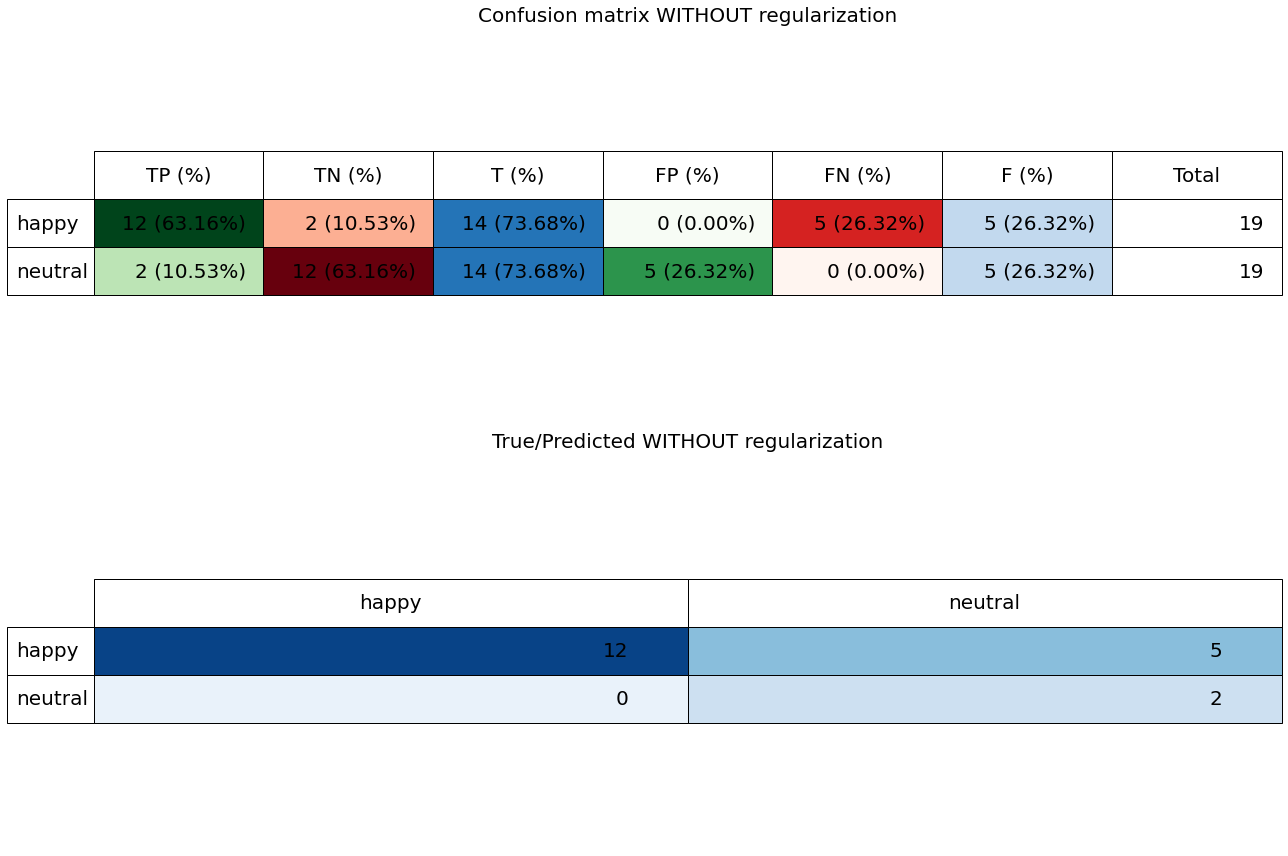

In [30]:
# Display as table
fig, axs = plt.subplots(2,1)

outputConfusionTables(labelNames, y_test.size, confusionTFPN, confusionLabels, axs, 0, "WITHOUT regularization")


fig.set_size_inches(18,6*len(labelNames))
fig.subplots_adjust(left=0.2, top=20)
fig.tight_layout()

#### Images classification

Text(0.5, 1.1, 'Images prediction (actual) labels')

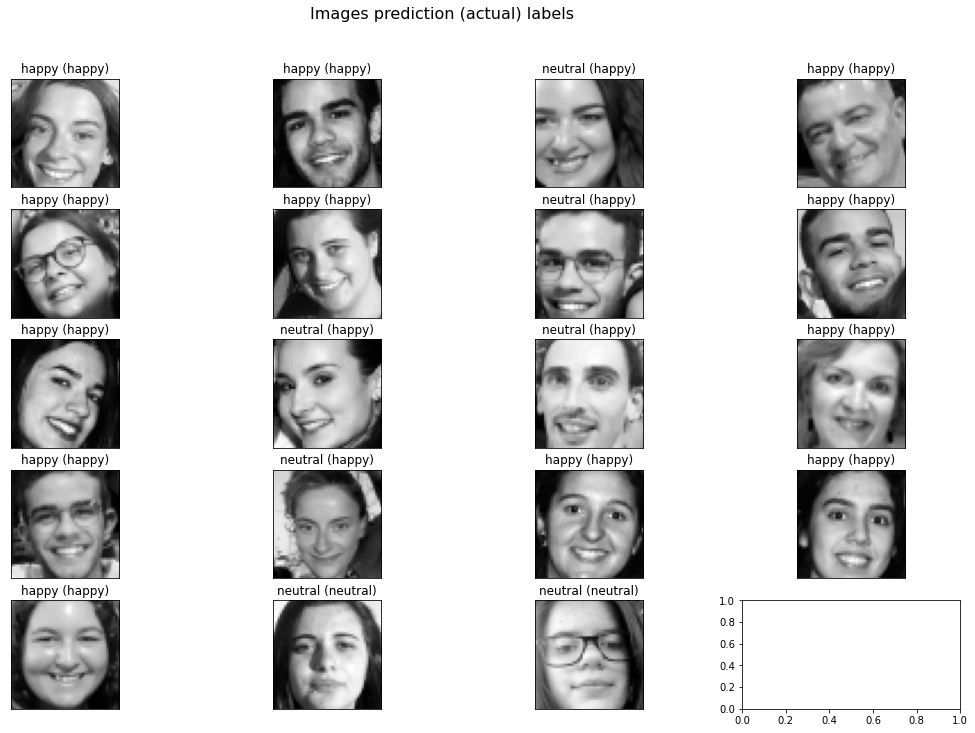

In [62]:
import math

imagesPerLine = 4
lines = math.ceil(len(y_test)/imagesPerLine)

fig, axis = plt.subplots(lines,imagesPerLine,figsize=(18,2*lines))
fig.subplots_adjust(top=1)

for i in range(lines):
    for j in range(imagesPerLine):
        index = i*imagesPerLine + j
        
        if X_test.shape[0]<=index:
            break
        
        # Show image
        axis[i,j].imshow(X_test[index,:].reshape(48,48,order="F").T, cmap="gray") 
        
        # Hide axes
        axis[i,j].set_xticks([])
        axis[i,j].set_yticks([])
        # Display title with predicted (actual)
        axis[i,j].set_title(f"{labelNames[y_pred[index]]} ({labelNames[y_test[index][0]]})")
        
fig.suptitle('Images prediction (actual) labels', fontsize=16, y=1.1)        